preprocessing + MSRFuseNet + PLM(39)

✅ GPU detected: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Total epochs: 46800, Each epoch samples: 1024
Valid epochs after masking: 44857


C:\Users\DST\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1024, 1)]    0           []                               
                                                                                                  
 gaussian_noise (GaussianNoise)  (None, 1024, 1)     0           ['input_1[0][0]']                
                                                                                                  
 separable_conv1d (SeparableCon  (None, 1024, 32)    79          ['gaussian_noise[0][0]']         
 v1D)                                                                                             
                                                                                                  
 batch_normalization (BatchNorm  (None, 1024, 32)    128         ['separable_conv1d[0][0]']   

 ing1D)                                                                                           
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 256, 32)     128         ['separable_conv1d_8[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 tf.math.subtract (TFOpLambda)  (None, 256, 32)      0           ['max_pooling1d_1[0][0]',        
                                                                  'average_pooling1d[0][0]']      
                                                                                                  
 add_1 (Add)                    (None, 256, 32)      0           ['batch_normalization_9[0][0]',  
                                                                  'tf.math.subtract[0][0]']       
          

 dense_6 (Dense)                (None, 5)            165         ['batch_normalization_14[0][0]'] 
                                                                                                  
Total params: 571,316
Trainable params: 569,876
Non-trainable params: 1,440
__________________________________________________________________________________________________
Epoch 1/100
1310/1310 [==============================] - 117s 79ms/step - loss: 0.4221 - accuracy: 0.3667 - val_loss: 0.4663 - val_accuracy: 0.3577 - lr: 1.0000e-04
Epoch 2/100
1310/1310 [==============================] - 101s 77ms/step - loss: 0.3559 - accuracy: 0.3854 - val_loss: 0.4427 - val_accuracy: 0.3716 - lr: 1.0000e-04
Epoch 3/100
1310/1310 [==============================] - 102s 78ms/step - loss: 0.3396 - accuracy: 0.3925 - val_loss: 0.3719 - val_accuracy: 0.4109 - lr: 1.0000e-04
Epoch 4/100
1310/1310 [==============================] - 100s 76ms/step - loss: 0.3297 - accuracy: 0.3984 - val_loss: 0.3744 - val_a

Epoch 48/100
1310/1310 [==============================] - 103s 78ms/step - loss: 0.1407 - accuracy: 0.7676 - val_loss: 0.1619 - val_accuracy: 0.7833 - lr: 1.2500e-05
Epoch 49/100
1310/1310 [==============================] - 97s 74ms/step - loss: 0.1396 - accuracy: 0.7707 - val_loss: 0.1635 - val_accuracy: 0.7821 - lr: 1.2500e-05
Epoch 50/100
1310/1310 [==============================] - 100s 76ms/step - loss: 0.1386 - accuracy: 0.7729 - val_loss: 0.1627 - val_accuracy: 0.7812 - lr: 1.2500e-05
Epoch 51/100
1310/1310 [==============================] - 101s 77ms/step - loss: 0.1371 - accuracy: 0.7722 - val_loss: 0.1614 - val_accuracy: 0.7822 - lr: 6.2500e-06
Epoch 52/100
1310/1310 [==============================] - 99s 76ms/step - loss: 0.1368 - accuracy: 0.7744 - val_loss: 0.1603 - val_accuracy: 0.7861 - lr: 6.2500e-06
Epoch 53/100
1310/1310 [==============================] - 100s 76ms/step - loss: 0.1371 - accuracy: 0.7738 - val_loss: 0.1593 - val_accuracy: 0.7856 - lr: 6.2500e-06
Epoch 

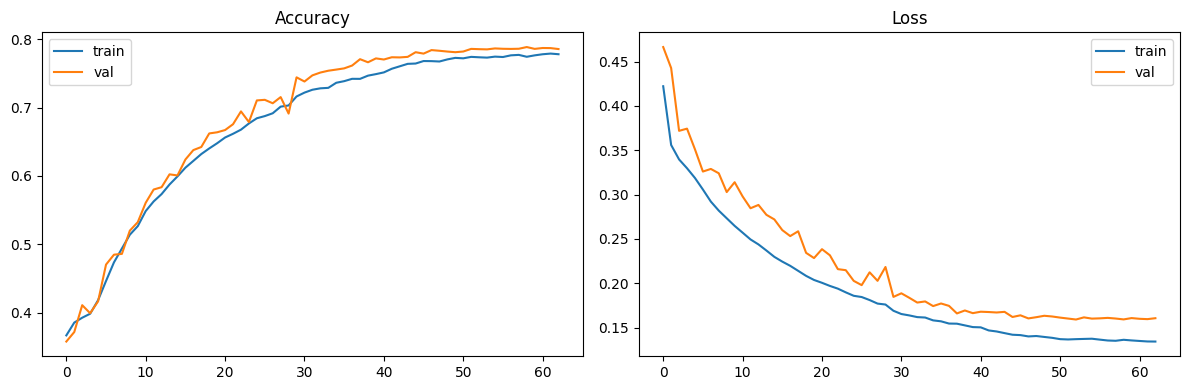

655/655 [==============================] - 12s 18ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.57      0.67      4192
           1       0.95      0.92      0.94      4191
           2       0.58      0.62      0.60      4192
           3       0.97      0.93      0.95      4192
           4       0.68      0.89      0.77      4192

    accuracy                           0.79     20959
   macro avg       0.80      0.79      0.79     20959
weighted avg       0.80      0.79      0.79     20959

[[2393    6 1307    3  483]
 [  38 3852  125   97   79]
 [ 404    5 2611    4 1168]
 [   3  174   84 3885   46]
 [  62    0  404    1 3725]]

🧠 Cohen Kappa Score: 0.7320


INFO:tensorflow:Assets written to: C:\Users\DST\AppData\Local\Temp\tmp7qrslqia\assets


INFO:tensorflow:Assets written to: C:\Users\DST\AppData\Local\Temp\tmp7qrslqia\assets



⏱️ Total training time: 105.12 minutes


In [1]:
import numpy as np
import os, glob, scipy.io, time
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import cheby2, filtfilt, resample_poly
from numpy.polynomial.polynomial import Polynomial

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, SeparableConv1D, MaxPooling1D, GlobalAveragePooling1D,
                                     Flatten, Dense, Dropout, Multiply, Add, LayerNormalization,
                                     Lambda, GaussianNoise, BatchNormalization, SpatialDropout1D,
                                     Concatenate, Masking)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

tf.keras.backend.clear_session()

# --- GPU setup ---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU detected: {gpus[0]}")
    tf.config.experimental.set_memory_growth(gpus[0], True)
else:
    print("⚠️ No GPU found. Training might be slow.")

# --- Constants ---
ORIG_FS = 256  # Original sampling frequency
TARGET_FS = 34.3  # Target sampling frequency (from paper)
EPOCH_SAMPLES = 1024  # Samples per epoch at TARGET_FS
TOTAL_HOURS = 10
EPOCHS_PER_HOUR = int(3600 * TARGET_FS / EPOCH_SAMPLES)  # epochs in 1 hour
TOTAL_EPOCHS = TOTAL_HOURS * EPOCHS_PER_HOUR  # fixed length for each subject

# --- Preprocessing functions ---

def cheby2_lowpass_filter(signal, fs, cutoff=8, order=8, rs=40):
    nyq = 0.5 * fs
    wp = cutoff / nyq
    b, a = cheby2(order, rs, wp, btype='low', analog=False)
    # zero-phase filtering with filtfilt
    filtered = filtfilt(b, a, signal)
    return filtered

def poly_detrend(signal, degree=10):
    x = np.arange(len(signal))
    coefs = Polynomial.fit(x, signal, degree).convert().coef
    trend = np.polyval(coefs[::-1], x)
    detrended = signal - trend
    return detrended

def min_max_norm(signal):
    min_val = np.min(signal)
    max_val = np.max(signal)
    if max_val - min_val == 0:
        return signal * 0  # avoid div by zero if flat signal
    return (signal - min_val) / (max_val - min_val)

def preprocess_ppg_signal(ppg_signal, orig_fs=ORIG_FS, target_fs=TARGET_FS,
                          epoch_samples=EPOCH_SAMPLES, total_epochs=TOTAL_EPOCHS):
    # 1. Filter
    filtered = cheby2_lowpass_filter(ppg_signal, orig_fs)
    # 2. Detrend
    detrended = poly_detrend(filtered)
    # 3. Min-max normalization
    normalized = min_max_norm(detrended)
    # 4. Resample to target_fs
    # Calculate up/down factors for resample_poly (rational approx)
    up = int(target_fs * 1000)
    down = int(orig_fs * 1000)
    gcd = np.gcd(up, down)
    up //= gcd
    down //= gcd
    resampled = resample_poly(normalized, up, down)
    # 5. Epoching: slice into fixed length segments of epoch_samples
    total_samples = epoch_samples * total_epochs
    if len(resampled) > total_samples:
        # truncate longer signals
        resampled = resampled[:total_samples]
    elif len(resampled) < total_samples:
        # zero pad shorter signals
        pad_len = total_samples - len(resampled)
        resampled = np.pad(resampled, (0, pad_len), 'constant')
    # 6. Reshape to epochs
    epochs = resampled.reshape(total_epochs, epoch_samples)
    # Create mask to mark zero-padded epochs (skip in loss)
    # Epoch is zero-padded if sum is zero
    mask = np.array([0 if np.sum(e) == 0 else 1 for e in epochs])
    return epochs, mask

# --- Load raw data and preprocess once ---

folder_path = r"D:\abhishek_extracted\plm"
mat_files = sorted(glob.glob(os.path.join(folder_path, "*.mat")))[:39]

X_epochs_list = []
y_epochs_list = []
mask_list = []

for file in mat_files:
    mat = scipy.io.loadmat(file)
    raw_signal = mat['ppg_signals'].flatten()
    sleep_labels = mat['sleep_stages'].flatten()

    # Preprocess raw signal to epochs + mask
    epochs, mask = preprocess_ppg_signal(raw_signal)

    # Adjust sleep labels to epochs length
    # We expect sleep_labels already aligned to epochs if 1 label per epoch.
    # If labels length < epochs length, pad with -1 (ignore)
    if len(sleep_labels) > epochs.shape[0]:
        sleep_labels = sleep_labels[:epochs.shape[0]]
    elif len(sleep_labels) < epochs.shape[0]:
        pad_len = epochs.shape[0] - len(sleep_labels)
        sleep_labels = np.pad(sleep_labels, (0, pad_len), constant_values=-1)

    X_epochs_list.append(epochs)
    y_epochs_list.append(sleep_labels)
    mask_list.append(mask)

X_all = np.vstack(X_epochs_list)  # shape: (total_epochs * subjects, epoch_samples)
y_all = np.concatenate(y_epochs_list)
mask_all = np.concatenate(mask_list)

print(f"Total epochs: {X_all.shape[0]}, Each epoch samples: {X_all.shape[1]}")

# Save preprocessed data for later fast loading (offline preprocessing)
np.save("ppg_epochs.npy", X_all)
np.save("sleep_labels.npy", y_all)
np.save("epoch_mask.npy", mask_all)

# --- Filter out zero-padded epochs for training ---
valid_idx = y_all != -1  # remove epochs with padded labels
valid_idx = valid_idx & (mask_all == 1)  # also remove zero-padded epochs

X_all = X_all[valid_idx]
y_all = y_all[valid_idx]

print(f"Valid epochs after masking: {len(y_all)}")

# --- Data Augmentation ---

def jitter(x, sigma=0.01):
    return x + np.random.normal(loc=0, scale=sigma, size=x.shape)

def scaling(x, sigma=0.1):
    return x * np.random.normal(loc=1.0, scale=sigma, size=x.shape)

def magnitude_warp(x, sigma=0.2):
    x = x.reshape(-1)
    warp = np.sin(np.linspace(0, np.pi, len(x))) * np.random.normal(1, sigma)
    return x * warp

# Class-wise augmentation for minority classes
np.random.seed(42)
augmented = []
minority_classes = np.where(np.bincount(y_all) < np.median(np.bincount(y_all)))[0]

for signal, label in zip(X_all, y_all):
    if label in minority_classes:
        if np.random.rand() < 0.5:
            signal = jitter(signal)
        if np.random.rand() < 0.5:
            signal = magnitude_warp(signal)
        if np.random.rand() < 0.5:
            signal = scaling(signal)
    augmented.append(signal)

X_aug = np.array(augmented)

# --- Standardization ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_aug)

# --- Handle Class Imbalance with SMOTE ---
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y_all)

# --- Class weights ---
class_weights = compute_class_weight("balanced", classes=np.unique(y_res), y=y_res)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, stratify=y_res, random_state=42
)

# Expand dims for CNN input
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# One-hot encoding
num_classes = 5
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# --- Focal loss ---
def focal_loss(gamma=1.5, alpha=[0.7, 0.5, 0.5, 0.3, 0.3]):
    alpha = tf.constant(alpha, dtype=tf.float32)
    def loss_fn(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        ce = -y_true * tf.math.log(y_pred)
        alpha_factor = y_true * alpha
        modulating_factor = tf.math.pow(1.0 - y_pred, gamma)
        loss = alpha_factor * modulating_factor * ce
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    return loss_fn

# --- Model tweaks: reduce filters and dense sizes for lighter model ---
def build_hybrid_cnn_rvfl_light(input_shape):
    reg = l2(1e-4)
    inputs = Input(shape=input_shape)
    x = GaussianNoise(0.05)(inputs)

    # First CNN Block: reduced filters from 64 → 32
    x = SeparableConv1D(32, 15, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)

    # MSR-SE Block: reduced filters 64 → 32
    branch1 = SeparableConv1D(32, 3, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch1 = BatchNormalization()(branch1)
    branch2 = SeparableConv1D(32, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch2 = BatchNormalization()(branch2)
    branch3 = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch3 = BatchNormalization()(branch3)
    concat = Concatenate()([branch1, branch2, branch3])
    squeeze = GlobalAveragePooling1D()(concat)
    excitation = Dense(32, activation='relu', kernel_regularizer=reg)(squeeze)
    excitation = BatchNormalization()(excitation)
    excitation = Dense(concat.shape[-1], activation='sigmoid', kernel_regularizer=reg)(excitation)
    excitation = Lambda(lambda s: tf.expand_dims(s, 1))(excitation)
    scaled = Multiply()([concat, excitation])
    residual = SeparableConv1D(concat.shape[-1], 1, padding='same', kernel_regularizer=reg)(x)
    residual = BatchNormalization()(residual)
    out = Add()([scaled, residual])
    x = LayerNormalization()(out)

    # Second Conv Block + Residual (filters halved)
    res = SeparableConv1D(16, 1, padding='same', kernel_regularizer=reg)(x)
    res = BatchNormalization()(res)
    x = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(32, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)

    # Frequency Fusion Block (filters halved)
    low = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    low = BatchNormalization()(low)
    high = x - tf.keras.layers.AveragePooling1D(pool_size=3, strides=1, padding='same')(x)
    x = Add()([low, high])
    x = LayerNormalization()(x)

    # Third Conv Block (filters halved)
    x = SeparableConv1D(64, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(64, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)

    # Attention
    attn = GlobalAveragePooling1D()(x)
    attn = Dense(128, activation="relu", kernel_regularizer=reg)(attn)
    attn = BatchNormalization()(attn)
    attn = Dense(64, activation="sigmoid", kernel_regularizer=reg)(attn)
    attn = Lambda(lambda z: tf.expand_dims(z, 1))(attn)
    x = Multiply()([x, attn])

    # Residual Merge
    x = Add()([x, res])
    x = LayerNormalization()(x)

    # RVFL Dense Layers (reduced units)
    x = Flatten()(x)
    x = Dense(64, activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)

    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs)


# --- Compile & train ---
model = build_hybrid_cnn_rvfl_light((X_train.shape[1], 1))
model.compile(optimizer=Adam(1e-4),
              loss=focal_loss(gamma=1.5, alpha=[0.7, 0.5, 0.5, 0.3, 0.3]),
              metrics=['accuracy'])

model.summary()

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("best_model.keras", save_best_only=True),
    ReduceLROnPlateau(patience=3, factor=0.5)
]

start_time = time.time()

history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat),
                    epochs=100, batch_size=64, class_weight=class_weight_dict,
                    callbacks=callbacks, verbose=1)

end_time = time.time()

# --- Plot training curves ---
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# --- Evaluation ---
y_pred = model.predict(X_test)
y_pred_cls = np.argmax(y_pred, axis=1)
y_true_cls = np.argmax(y_test_cat, axis=1)

print("\nClassification Report:")
print(classification_report(y_true_cls, y_pred_cls))

cm = confusion_matrix(y_true_cls, y_pred_cls)
print(cm)

kappa = cohen_kappa_score(y_true_cls, y_pred_cls)
print(f"\n🧠 Cohen Kappa Score: {kappa:.4f}")

# --- Save model ---
model.save("cnn_rvfl_light_model.keras")

# --- Export TFLite ---
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("cnn_rvfl_light_model.tflite", "wb") as f:
    f.write(tflite_model)

print(f"\n⏱️ Total training time: {(end_time - start_time)/60:.2f} minutes")


In [5]:
from sklearn.metrics import accuracy_score

total_acc = accuracy_score(y_true_cls, y_pred_cls)
print(f"\n✅ Overall Test Accuracy: {total_acc:.4f}")



✅ Overall Test Accuracy: 0.7856


In [2]:
from sklearn.metrics import f1_score, precision_score, recall_score

print("Macro F1 Score:", f1_score(y_true_cls, y_pred_cls, average='macro'))
print("Weighted F1 Score:", f1_score(y_true_cls, y_pred_cls, average='weighted'))
print("Macro Precision:", precision_score(y_true_cls, y_pred_cls, average='macro'))
print("Macro Recall:", recall_score(y_true_cls, y_pred_cls, average='macro'))


Macro F1 Score: 0.7856097258589128
Weighted F1 Score: 0.7856025353776868
Macro Precision: 0.8012865215761179
Macro Recall: 0.7856354538350991


In [3]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"\n📈 Final Accuracy: Train = {final_train_acc:.4f}, Val = {final_val_acc:.4f}")
print(f"📉 Final Loss: Train = {final_train_loss:.4f}, Val = {final_val_loss:.4f}")



📈 Final Accuracy: Train = 0.7782, Val = 0.7858
📉 Final Loss: Train = 0.1344, Val = 0.1607


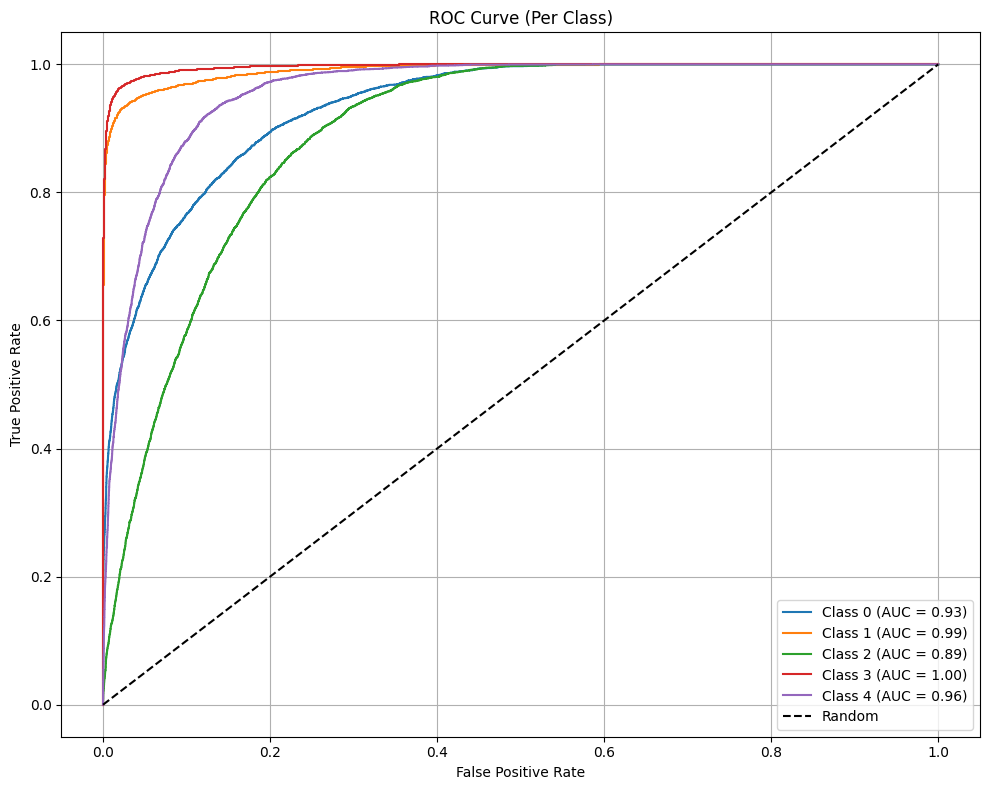

In [4]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Ensure y_test is binarized
n_classes = 5
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Per Class)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


preprocessing + MSRFuseNet + Apnea(39)

✅ GPU detected: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Total epochs: 46800, Each epoch samples: 1024
Valid epochs after masking: 45746


C:\Users\DST\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1024, 1)]    0           []                               
                                                                                                  
 gaussian_noise (GaussianNoise)  (None, 1024, 1)     0           ['input_1[0][0]']                
                                                                                                  
 separable_conv1d (SeparableCon  (None, 1024, 32)    79          ['gaussian_noise[0][0]']         
 v1D)                                                                                             
                                                                                                  
 batch_normalization (BatchNorm  (None, 1024, 32)    128         ['separable_conv1d[0][0]']   

 ing1D)                                                                                           
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 256, 32)     128         ['separable_conv1d_8[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 tf.math.subtract (TFOpLambda)  (None, 256, 32)      0           ['max_pooling1d_1[0][0]',        
                                                                  'average_pooling1d[0][0]']      
                                                                                                  
 add_1 (Add)                    (None, 256, 32)      0           ['batch_normalization_9[0][0]',  
                                                                  'tf.math.subtract[0][0]']       
          

 dense_6 (Dense)                (None, 5)            165         ['batch_normalization_14[0][0]'] 
                                                                                                  
Total params: 571,316
Trainable params: 569,876
Non-trainable params: 1,440
__________________________________________________________________________________________________
Epoch 1/100
1136/1136 [==============================] - 87s 72ms/step - loss: 0.4304 - accuracy: 0.3539 - val_loss: 0.4722 - val_accuracy: 0.3716 - lr: 1.0000e-04
Epoch 2/100
1136/1136 [==============================] - 83s 73ms/step - loss: 0.3733 - accuracy: 0.3695 - val_loss: 0.5592 - val_accuracy: 0.3177 - lr: 1.0000e-04
Epoch 3/100
1136/1136 [==============================] - 84s 74ms/step - loss: 0.3571 - accuracy: 0.3781 - val_loss: 0.5225 - val_accuracy: 0.3338 - lr: 1.0000e-04
Epoch 4/100
1136/1136 [==============================] - 84s 74ms/step - loss: 0.3451 - accuracy: 0.3857 - val_loss: 0.4943 - val_accur

Epoch 48/100
1136/1136 [==============================] - 87s 76ms/step - loss: 0.2111 - accuracy: 0.6335 - val_loss: 0.2378 - val_accuracy: 0.6384 - lr: 2.5000e-05
Epoch 49/100
1136/1136 [==============================] - 87s 77ms/step - loss: 0.2101 - accuracy: 0.6353 - val_loss: 0.2416 - val_accuracy: 0.6347 - lr: 2.5000e-05
Epoch 50/100
1136/1136 [==============================] - 86s 76ms/step - loss: 0.2086 - accuracy: 0.6380 - val_loss: 0.2355 - val_accuracy: 0.6280 - lr: 2.5000e-05
Epoch 51/100
1136/1136 [==============================] - 87s 76ms/step - loss: 0.2087 - accuracy: 0.6367 - val_loss: 0.2330 - val_accuracy: 0.6449 - lr: 2.5000e-05
Epoch 52/100
1136/1136 [==============================] - 85s 75ms/step - loss: 0.2077 - accuracy: 0.6410 - val_loss: 0.2322 - val_accuracy: 0.6455 - lr: 2.5000e-05
Epoch 53/100
1136/1136 [==============================] - 87s 77ms/step - loss: 0.2074 - accuracy: 0.6407 - val_loss: 0.2343 - val_accuracy: 0.6468 - lr: 2.5000e-05
Epoch 54/1

Epoch 98/100
1136/1136 [==============================] - 82s 73ms/step - loss: 0.1812 - accuracy: 0.6869 - val_loss: 0.2054 - val_accuracy: 0.6907 - lr: 3.1250e-06
Epoch 99/100
1136/1136 [==============================] - 84s 74ms/step - loss: 0.1824 - accuracy: 0.6864 - val_loss: 0.2040 - val_accuracy: 0.6931 - lr: 3.1250e-06
Epoch 100/100
1136/1136 [==============================] - 83s 73ms/step - loss: 0.1814 - accuracy: 0.6902 - val_loss: 0.2035 - val_accuracy: 0.6948 - lr: 3.1250e-06


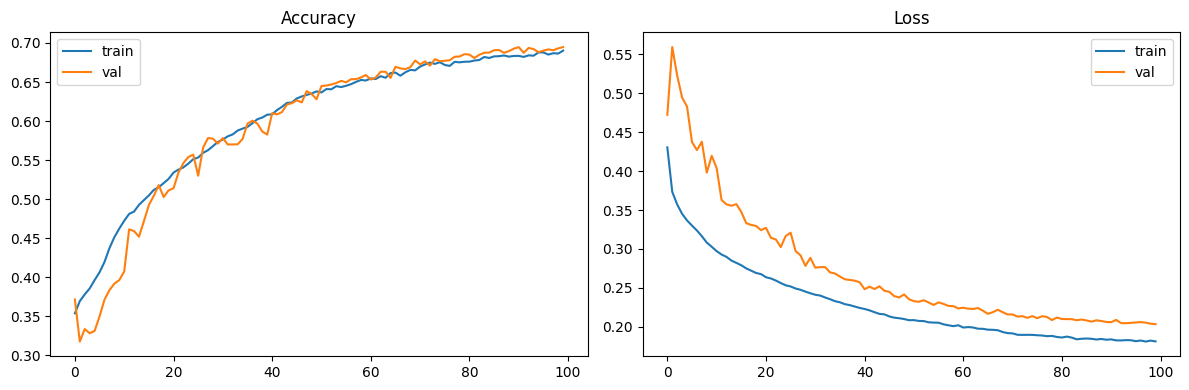

568/568 [==============================] - 10s 17ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      3633
           1       0.82      0.82      0.82      3632
           2       0.49      0.74      0.59      3633
           3       0.93      0.71      0.80      3633
           4       0.67      0.57      0.62      3632

    accuracy                           0.69     18163
   macro avg       0.73      0.69      0.70     18163
weighted avg       0.73      0.69      0.70     18163

[[2325    1 1061    2  244]
 [ 106 2967  245  159  155]
 [ 427    1 2682    9  514]
 [  46  633  286 2565  103]
 [ 310    1 1231   10 2080]]

🧠 Cohen Kappa Score: 0.6185


INFO:tensorflow:Assets written to: C:\Users\DST\AppData\Local\Temp\tmp4jrm6n7f\assets


INFO:tensorflow:Assets written to: C:\Users\DST\AppData\Local\Temp\tmp4jrm6n7f\assets



⏱️ Total training time: 142.07 minutes


In [7]:
import numpy as np
import os, glob, scipy.io, time
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import cheby2, filtfilt, resample_poly
from numpy.polynomial.polynomial import Polynomial

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, SeparableConv1D, MaxPooling1D, GlobalAveragePooling1D,
                                     Flatten, Dense, Dropout, Multiply, Add, LayerNormalization,
                                     Lambda, GaussianNoise, BatchNormalization, SpatialDropout1D,
                                     Concatenate, Masking)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

tf.keras.backend.clear_session()

# --- GPU setup ---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU detected: {gpus[0]}")
    tf.config.experimental.set_memory_growth(gpus[0], True)
else:
    print("⚠️ No GPU found. Training might be slow.")

# --- Constants ---
ORIG_FS = 256  # Original sampling frequency
TARGET_FS = 34.3  # Target sampling frequency (from paper)
EPOCH_SAMPLES = 1024  # Samples per epoch at TARGET_FS
TOTAL_HOURS = 10
EPOCHS_PER_HOUR = int(3600 * TARGET_FS / EPOCH_SAMPLES)  # epochs in 1 hour
TOTAL_EPOCHS = TOTAL_HOURS * EPOCHS_PER_HOUR  # fixed length for each subject

# --- Preprocessing functions ---

def cheby2_lowpass_filter(signal, fs, cutoff=8, order=8, rs=40):
    nyq = 0.5 * fs
    wp = cutoff / nyq
    b, a = cheby2(order, rs, wp, btype='low', analog=False)
    # zero-phase filtering with filtfilt
    filtered = filtfilt(b, a, signal)
    return filtered

def poly_detrend(signal, degree=10):
    x = np.arange(len(signal))
    coefs = Polynomial.fit(x, signal, degree).convert().coef
    trend = np.polyval(coefs[::-1], x)
    detrended = signal - trend
    return detrended

def min_max_norm(signal):
    min_val = np.min(signal)
    max_val = np.max(signal)
    if max_val - min_val == 0:
        return signal * 0  # avoid div by zero if flat signal
    return (signal - min_val) / (max_val - min_val)

def preprocess_ppg_signal(ppg_signal, orig_fs=ORIG_FS, target_fs=TARGET_FS,
                          epoch_samples=EPOCH_SAMPLES, total_epochs=TOTAL_EPOCHS):
    # 1. Filter
    filtered = cheby2_lowpass_filter(ppg_signal, orig_fs)
    # 2. Detrend
    detrended = poly_detrend(filtered)
    # 3. Min-max normalization
    normalized = min_max_norm(detrended)
    # 4. Resample to target_fs
    # Calculate up/down factors for resample_poly (rational approx)
    up = int(target_fs * 1000)
    down = int(orig_fs * 1000)
    gcd = np.gcd(up, down)
    up //= gcd
    down //= gcd
    resampled = resample_poly(normalized, up, down)
    # 5. Epoching: slice into fixed length segments of epoch_samples
    total_samples = epoch_samples * total_epochs
    if len(resampled) > total_samples:
        # truncate longer signals
        resampled = resampled[:total_samples]
    elif len(resampled) < total_samples:
        # zero pad shorter signals
        pad_len = total_samples - len(resampled)
        resampled = np.pad(resampled, (0, pad_len), 'constant')
    # 6. Reshape to epochs
    epochs = resampled.reshape(total_epochs, epoch_samples)
    # Create mask to mark zero-padded epochs (skip in loss)
    # Epoch is zero-padded if sum is zero
    mask = np.array([0 if np.sum(e) == 0 else 1 for e in epochs])
    return epochs, mask

# --- Load raw data and preprocess once ---

folder_path = r"D:\abhishek_extracted\apnea"
mat_files = sorted(glob.glob(os.path.join(folder_path, "*.mat")))[:39]

X_epochs_list = []
y_epochs_list = []
mask_list = []

for file in mat_files:
    mat = scipy.io.loadmat(file)
    raw_signal = mat['ppg_signals'].flatten()
    sleep_labels = mat['sleep_stages'].flatten()

    # Preprocess raw signal to epochs + mask
    epochs, mask = preprocess_ppg_signal(raw_signal)

    # Adjust sleep labels to epochs length
    # We expect sleep_labels already aligned to epochs if 1 label per epoch.
    # If labels length < epochs length, pad with -1 (ignore)
    if len(sleep_labels) > epochs.shape[0]:
        sleep_labels = sleep_labels[:epochs.shape[0]]
    elif len(sleep_labels) < epochs.shape[0]:
        pad_len = epochs.shape[0] - len(sleep_labels)
        sleep_labels = np.pad(sleep_labels, (0, pad_len), constant_values=-1)

    X_epochs_list.append(epochs)
    y_epochs_list.append(sleep_labels)
    mask_list.append(mask)

X_all = np.vstack(X_epochs_list)  # shape: (total_epochs * subjects, epoch_samples)
y_all = np.concatenate(y_epochs_list)
mask_all = np.concatenate(mask_list)

print(f"Total epochs: {X_all.shape[0]}, Each epoch samples: {X_all.shape[1]}")

# Save preprocessed data for later fast loading (offline preprocessing)
np.save("ppg_epochs.npy", X_all)
np.save("sleep_labels.npy", y_all)
np.save("epoch_mask.npy", mask_all)

# --- Filter out zero-padded epochs for training ---
valid_idx = y_all != -1  # remove epochs with padded labels
valid_idx = valid_idx & (mask_all == 1)  # also remove zero-padded epochs

X_all = X_all[valid_idx]
y_all = y_all[valid_idx]

print(f"Valid epochs after masking: {len(y_all)}")

# --- Data Augmentation ---

def jitter(x, sigma=0.01):
    return x + np.random.normal(loc=0, scale=sigma, size=x.shape)

def scaling(x, sigma=0.1):
    return x * np.random.normal(loc=1.0, scale=sigma, size=x.shape)

def magnitude_warp(x, sigma=0.2):
    x = x.reshape(-1)
    warp = np.sin(np.linspace(0, np.pi, len(x))) * np.random.normal(1, sigma)
    return x * warp

# Class-wise augmentation for minority classes
np.random.seed(42)
augmented = []
minority_classes = np.where(np.bincount(y_all) < np.median(np.bincount(y_all)))[0]

for signal, label in zip(X_all, y_all):
    if label in minority_classes:
        if np.random.rand() < 0.5:
            signal = jitter(signal)
        if np.random.rand() < 0.5:
            signal = magnitude_warp(signal)
        if np.random.rand() < 0.5:
            signal = scaling(signal)
    augmented.append(signal)

X_aug = np.array(augmented)

# --- Standardization ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_aug)

# --- Handle Class Imbalance with SMOTE ---
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y_all)

# --- Class weights ---
class_weights = compute_class_weight("balanced", classes=np.unique(y_res), y=y_res)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, stratify=y_res, random_state=42
)

# Expand dims for CNN input
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# One-hot encoding
num_classes = 5
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# --- Focal loss ---
def focal_loss(gamma=1.5, alpha=[0.7, 0.5, 0.5, 0.3, 0.3]):
    alpha = tf.constant(alpha, dtype=tf.float32)
    def loss_fn(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        ce = -y_true * tf.math.log(y_pred)
        alpha_factor = y_true * alpha
        modulating_factor = tf.math.pow(1.0 - y_pred, gamma)
        loss = alpha_factor * modulating_factor * ce
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    return loss_fn

# --- Model tweaks: reduce filters and dense sizes for lighter model ---
def build_hybrid_cnn_rvfl_light(input_shape):
    reg = l2(1e-4)
    inputs = Input(shape=input_shape)
    x = GaussianNoise(0.05)(inputs)

    # First CNN Block: reduced filters from 64 → 32
    x = SeparableConv1D(32, 15, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)

    # MSR-SE Block: reduced filters 64 → 32
    branch1 = SeparableConv1D(32, 3, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch1 = BatchNormalization()(branch1)
    branch2 = SeparableConv1D(32, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch2 = BatchNormalization()(branch2)
    branch3 = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch3 = BatchNormalization()(branch3)
    concat = Concatenate()([branch1, branch2, branch3])
    squeeze = GlobalAveragePooling1D()(concat)
    excitation = Dense(32, activation='relu', kernel_regularizer=reg)(squeeze)
    excitation = BatchNormalization()(excitation)
    excitation = Dense(concat.shape[-1], activation='sigmoid', kernel_regularizer=reg)(excitation)
    excitation = Lambda(lambda s: tf.expand_dims(s, 1))(excitation)
    scaled = Multiply()([concat, excitation])
    residual = SeparableConv1D(concat.shape[-1], 1, padding='same', kernel_regularizer=reg)(x)
    residual = BatchNormalization()(residual)
    out = Add()([scaled, residual])
    x = LayerNormalization()(out)

    # Second Conv Block + Residual (filters halved)
    res = SeparableConv1D(16, 1, padding='same', kernel_regularizer=reg)(x)
    res = BatchNormalization()(res)
    x = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(32, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)

    # Frequency Fusion Block (filters halved)
    low = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    low = BatchNormalization()(low)
    high = x - tf.keras.layers.AveragePooling1D(pool_size=3, strides=1, padding='same')(x)
    x = Add()([low, high])
    x = LayerNormalization()(x)

    # Third Conv Block (filters halved)
    x = SeparableConv1D(64, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(64, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)

    # Attention
    attn = GlobalAveragePooling1D()(x)
    attn = Dense(128, activation="relu", kernel_regularizer=reg)(attn)
    attn = BatchNormalization()(attn)
    attn = Dense(64, activation="sigmoid", kernel_regularizer=reg)(attn)
    attn = Lambda(lambda z: tf.expand_dims(z, 1))(attn)
    x = Multiply()([x, attn])

    # Residual Merge
    x = Add()([x, res])
    x = LayerNormalization()(x)

    # RVFL Dense Layers (reduced units)
    x = Flatten()(x)
    x = Dense(64, activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)

    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs)


# --- Compile & train ---
model = build_hybrid_cnn_rvfl_light((X_train.shape[1], 1))
model.compile(optimizer=Adam(1e-4),
              loss=focal_loss(gamma=1.5, alpha=[0.7, 0.5, 0.5, 0.3, 0.3]),
              metrics=['accuracy'])

model.summary()

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("best_model.keras", save_best_only=True),
    ReduceLROnPlateau(patience=3, factor=0.5)
]

start_time = time.time()

history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat),
                    epochs=100, batch_size=64, class_weight=class_weight_dict,
                    callbacks=callbacks, verbose=1)

end_time = time.time()

# --- Plot training curves ---
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# --- Evaluation ---
y_pred = model.predict(X_test)
y_pred_cls = np.argmax(y_pred, axis=1)
y_true_cls = np.argmax(y_test_cat, axis=1)

print("\nClassification Report:")
print(classification_report(y_true_cls, y_pred_cls))

cm = confusion_matrix(y_true_cls, y_pred_cls)
print(cm)

kappa = cohen_kappa_score(y_true_cls, y_pred_cls)
print(f"\n🧠 Cohen Kappa Score: {kappa:.4f}")

# --- Save model ---
model.save("cnn_rvfl_light_model.keras")

# --- Export TFLite ---
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("cnn_rvfl_light_model.tflite", "wb") as f:
    f.write(tflite_model)

print(f"\n⏱️ Total training time: {(end_time - start_time)/60:.2f} minutes")


preprocessing + MSRFuseNet + Insomnia(39)

✅ GPU detected: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Total epochs: 46800, Each epoch samples: 1024
Valid epochs after masking: 44131


C:\Users\DST\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1024, 1)]    0           []                               
                                                                                                  
 gaussian_noise (GaussianNoise)  (None, 1024, 1)     0           ['input_1[0][0]']                
                                                                                                  
 separable_conv1d (SeparableCon  (None, 1024, 32)    79          ['gaussian_noise[0][0]']         
 v1D)                                                                                             
                                                                                                  
 batch_normalization (BatchNorm  (None, 1024, 32)    128         ['separable_conv1d[0][0]']   

 ing1D)                                                                                           
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 256, 32)     128         ['separable_conv1d_8[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 tf.math.subtract (TFOpLambda)  (None, 256, 32)      0           ['max_pooling1d_1[0][0]',        
                                                                  'average_pooling1d[0][0]']      
                                                                                                  
 add_1 (Add)                    (None, 256, 32)      0           ['batch_normalization_9[0][0]',  
                                                                  'tf.math.subtract[0][0]']       
          

 dense_6 (Dense)                (None, 5)            165         ['batch_normalization_14[0][0]'] 
                                                                                                  
Total params: 571,316
Trainable params: 569,876
Non-trainable params: 1,440
__________________________________________________________________________________________________
Epoch 1/100
1104/1104 [==============================] - 95s 78ms/step - loss: 0.4551 - accuracy: 0.3620 - val_loss: 0.3977 - val_accuracy: 0.4127 - lr: 1.0000e-04
Epoch 2/100
1104/1104 [==============================] - 84s 76ms/step - loss: 0.3716 - accuracy: 0.4086 - val_loss: 0.4254 - val_accuracy: 0.4467 - lr: 1.0000e-04
Epoch 3/100
1104/1104 [==============================] - 84s 76ms/step - loss: 0.3468 - accuracy: 0.4285 - val_loss: 0.4287 - val_accuracy: 0.4220 - lr: 1.0000e-04
Epoch 4/100
1104/1104 [==============================] - 83s 75ms/step - loss: 0.3305 - accuracy: 0.4417 - val_loss: 0.4701 - val_accur

Epoch 48/100
1104/1104 [==============================] - 83s 76ms/step - loss: 0.1805 - accuracy: 0.7049 - val_loss: 0.2057 - val_accuracy: 0.7173 - lr: 2.5000e-05
Epoch 49/100
1104/1104 [==============================] - 81s 73ms/step - loss: 0.1804 - accuracy: 0.7064 - val_loss: 0.2056 - val_accuracy: 0.7164 - lr: 2.5000e-05
Epoch 50/100
1104/1104 [==============================] - 84s 76ms/step - loss: 0.1793 - accuracy: 0.7067 - val_loss: 0.2113 - val_accuracy: 0.7121 - lr: 2.5000e-05
Epoch 51/100
1104/1104 [==============================] - 81s 74ms/step - loss: 0.1773 - accuracy: 0.7136 - val_loss: 0.2045 - val_accuracy: 0.7200 - lr: 1.2500e-05
Epoch 52/100
1104/1104 [==============================] - 82s 74ms/step - loss: 0.1757 - accuracy: 0.7147 - val_loss: 0.2025 - val_accuracy: 0.7188 - lr: 1.2500e-05
Epoch 53/100
1104/1104 [==============================] - 81s 73ms/step - loss: 0.1762 - accuracy: 0.7142 - val_loss: 0.2061 - val_accuracy: 0.7160 - lr: 1.2500e-05
Epoch 54/1

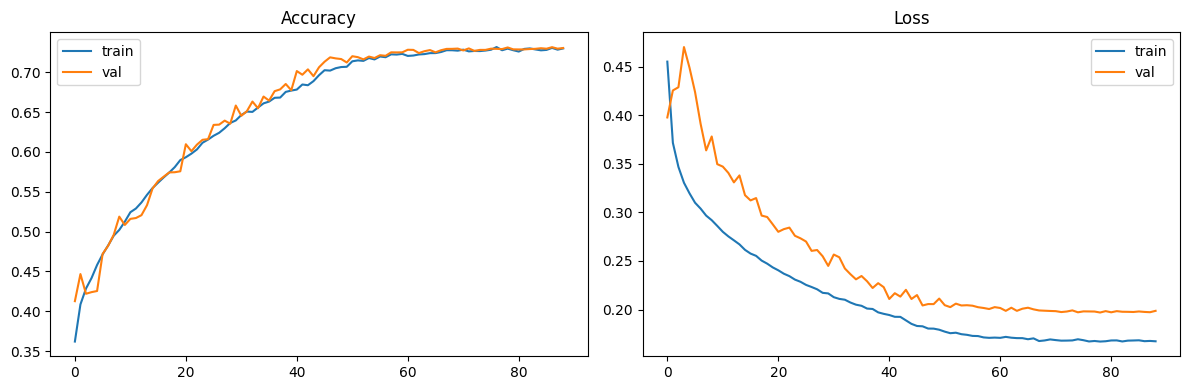

552/552 [==============================] - 10s 17ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.61      0.65      3530
           1       0.88      0.85      0.86      3530
           2       0.52      0.76      0.62      3530
           3       0.94      0.77      0.85      3530
           4       0.74      0.66      0.70      3530

    accuracy                           0.73     17650
   macro avg       0.76      0.73      0.74     17650
weighted avg       0.76      0.73      0.74     17650

[[2165    1 1084    0  280]
 [ 113 2987  210  159   61]
 [ 466    4 2685    1  374]
 [  70  391  234 2733  102]
 [ 286    0  909    1 2334]]

🧠 Cohen Kappa Score: 0.6639


INFO:tensorflow:Assets written to: C:\Users\DST\AppData\Local\Temp\tmpagex5_da\assets


INFO:tensorflow:Assets written to: C:\Users\DST\AppData\Local\Temp\tmpagex5_da\assets



⏱️ Total training time: 121.83 minutes


In [3]:
import numpy as np
import os, glob, scipy.io, time
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import cheby2, filtfilt, resample_poly
from numpy.polynomial.polynomial import Polynomial

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, SeparableConv1D, MaxPooling1D, GlobalAveragePooling1D,
                                     Flatten, Dense, Dropout, Multiply, Add, LayerNormalization,
                                     Lambda, GaussianNoise, BatchNormalization, SpatialDropout1D,
                                     Concatenate, Masking)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

tf.keras.backend.clear_session()

# --- GPU setup ---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU detected: {gpus[0]}")
    tf.config.experimental.set_memory_growth(gpus[0], True)
else:
    print("⚠️ No GPU found. Training might be slow.")

# --- Constants ---
ORIG_FS = 256  # Original sampling frequency
TARGET_FS = 34.3  # Target sampling frequency (from paper)
EPOCH_SAMPLES = 1024  # Samples per epoch at TARGET_FS
TOTAL_HOURS = 10
EPOCHS_PER_HOUR = int(3600 * TARGET_FS / EPOCH_SAMPLES)  # epochs in 1 hour
TOTAL_EPOCHS = TOTAL_HOURS * EPOCHS_PER_HOUR  # fixed length for each subject

# --- Preprocessing functions ---

def cheby2_lowpass_filter(signal, fs, cutoff=8, order=8, rs=40):
    nyq = 0.5 * fs
    wp = cutoff / nyq
    b, a = cheby2(order, rs, wp, btype='low', analog=False)
    # zero-phase filtering with filtfilt
    filtered = filtfilt(b, a, signal)
    return filtered

def poly_detrend(signal, degree=10):
    x = np.arange(len(signal))
    coefs = Polynomial.fit(x, signal, degree).convert().coef
    trend = np.polyval(coefs[::-1], x)
    detrended = signal - trend
    return detrended

def min_max_norm(signal):
    min_val = np.min(signal)
    max_val = np.max(signal)
    if max_val - min_val == 0:
        return signal * 0  # avoid div by zero if flat signal
    return (signal - min_val) / (max_val - min_val)

def preprocess_ppg_signal(ppg_signal, orig_fs=ORIG_FS, target_fs=TARGET_FS,
                          epoch_samples=EPOCH_SAMPLES, total_epochs=TOTAL_EPOCHS):
    # 1. Filter
    filtered = cheby2_lowpass_filter(ppg_signal, orig_fs)
    # 2. Detrend
    detrended = poly_detrend(filtered)
    # 3. Min-max normalization
    normalized = min_max_norm(detrended)
    # 4. Resample to target_fs
    # Calculate up/down factors for resample_poly (rational approx)
    up = int(target_fs * 1000)
    down = int(orig_fs * 1000)
    gcd = np.gcd(up, down)
    up //= gcd
    down //= gcd
    resampled = resample_poly(normalized, up, down)
    # 5. Epoching: slice into fixed length segments of epoch_samples
    total_samples = epoch_samples * total_epochs
    if len(resampled) > total_samples:
        # truncate longer signals
        resampled = resampled[:total_samples]
    elif len(resampled) < total_samples:
        # zero pad shorter signals
        pad_len = total_samples - len(resampled)
        resampled = np.pad(resampled, (0, pad_len), 'constant')
    # 6. Reshape to epochs
    epochs = resampled.reshape(total_epochs, epoch_samples)
    # Create mask to mark zero-padded epochs (skip in loss)
    # Epoch is zero-padded if sum is zero
    mask = np.array([0 if np.sum(e) == 0 else 1 for e in epochs])
    return epochs, mask

# --- Load raw data and preprocess once ---

folder_path = r"D:\abhishek_extracted\insomnia"
mat_files = sorted(glob.glob(os.path.join(folder_path, "*.mat")))[:39]

X_epochs_list = []
y_epochs_list = []
mask_list = []

for file in mat_files:
    mat = scipy.io.loadmat(file)
    raw_signal = mat['ppg_signals'].flatten()
    sleep_labels = mat['sleep_stages'].flatten()

    # Preprocess raw signal to epochs + mask
    epochs, mask = preprocess_ppg_signal(raw_signal)

    # Adjust sleep labels to epochs length
    # We expect sleep_labels already aligned to epochs if 1 label per epoch.
    # If labels length < epochs length, pad with -1 (ignore)
    if len(sleep_labels) > epochs.shape[0]:
        sleep_labels = sleep_labels[:epochs.shape[0]]
    elif len(sleep_labels) < epochs.shape[0]:
        pad_len = epochs.shape[0] - len(sleep_labels)
        sleep_labels = np.pad(sleep_labels, (0, pad_len), constant_values=-1)

    X_epochs_list.append(epochs)
    y_epochs_list.append(sleep_labels)
    mask_list.append(mask)

X_all = np.vstack(X_epochs_list)  # shape: (total_epochs * subjects, epoch_samples)
y_all = np.concatenate(y_epochs_list)
mask_all = np.concatenate(mask_list)

print(f"Total epochs: {X_all.shape[0]}, Each epoch samples: {X_all.shape[1]}")

# Save preprocessed data for later fast loading (offline preprocessing)
np.save("ppg_epochs.npy", X_all)
np.save("sleep_labels.npy", y_all)
np.save("epoch_mask.npy", mask_all)

# --- Filter out zero-padded epochs for training ---
valid_idx = y_all != -1  # remove epochs with padded labels
valid_idx = valid_idx & (mask_all == 1)  # also remove zero-padded epochs

X_all = X_all[valid_idx]
y_all = y_all[valid_idx]

print(f"Valid epochs after masking: {len(y_all)}")

# --- Data Augmentation ---

def jitter(x, sigma=0.01):
    return x + np.random.normal(loc=0, scale=sigma, size=x.shape)

def scaling(x, sigma=0.1):
    return x * np.random.normal(loc=1.0, scale=sigma, size=x.shape)

def magnitude_warp(x, sigma=0.2):
    x = x.reshape(-1)
    warp = np.sin(np.linspace(0, np.pi, len(x))) * np.random.normal(1, sigma)
    return x * warp

# Class-wise augmentation for minority classes
np.random.seed(42)
augmented = []
minority_classes = np.where(np.bincount(y_all) < np.median(np.bincount(y_all)))[0]

for signal, label in zip(X_all, y_all):
    if label in minority_classes:
        if np.random.rand() < 0.5:
            signal = jitter(signal)
        if np.random.rand() < 0.5:
            signal = magnitude_warp(signal)
        if np.random.rand() < 0.5:
            signal = scaling(signal)
    augmented.append(signal)

X_aug = np.array(augmented)

# --- Standardization ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_aug)

# --- Handle Class Imbalance with SMOTE ---
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y_all)

# --- Class weights ---
class_weights = compute_class_weight("balanced", classes=np.unique(y_res), y=y_res)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, stratify=y_res, random_state=42
)

# Expand dims for CNN input
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# One-hot encoding
num_classes = 5
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# --- Focal loss ---
def focal_loss(gamma=1.5, alpha=[0.7, 0.5, 0.5, 0.3, 0.3]):
    alpha = tf.constant(alpha, dtype=tf.float32)
    def loss_fn(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        ce = -y_true * tf.math.log(y_pred)
        alpha_factor = y_true * alpha
        modulating_factor = tf.math.pow(1.0 - y_pred, gamma)
        loss = alpha_factor * modulating_factor * ce
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    return loss_fn

# --- Model tweaks: reduce filters and dense sizes for lighter model ---
def build_hybrid_cnn_rvfl_light(input_shape):
    reg = l2(1e-4)
    inputs = Input(shape=input_shape)
    x = GaussianNoise(0.05)(inputs)

    # First CNN Block: reduced filters from 64 → 32
    x = SeparableConv1D(32, 15, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)

    # MSR-SE Block: reduced filters 64 → 32
    branch1 = SeparableConv1D(32, 3, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch1 = BatchNormalization()(branch1)
    branch2 = SeparableConv1D(32, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch2 = BatchNormalization()(branch2)
    branch3 = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    branch3 = BatchNormalization()(branch3)
    concat = Concatenate()([branch1, branch2, branch3])
    squeeze = GlobalAveragePooling1D()(concat)
    excitation = Dense(32, activation='relu', kernel_regularizer=reg)(squeeze)
    excitation = BatchNormalization()(excitation)
    excitation = Dense(concat.shape[-1], activation='sigmoid', kernel_regularizer=reg)(excitation)
    excitation = Lambda(lambda s: tf.expand_dims(s, 1))(excitation)
    scaled = Multiply()([concat, excitation])
    residual = SeparableConv1D(concat.shape[-1], 1, padding='same', kernel_regularizer=reg)(x)
    residual = BatchNormalization()(residual)
    out = Add()([scaled, residual])
    x = LayerNormalization()(out)

    # Second Conv Block + Residual (filters halved)
    res = SeparableConv1D(16, 1, padding='same', kernel_regularizer=reg)(x)
    res = BatchNormalization()(res)
    x = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(32, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)

    # Frequency Fusion Block (filters halved)
    low = SeparableConv1D(32, 7, padding='same', activation='relu', kernel_regularizer=reg)(x)
    low = BatchNormalization()(low)
    high = x - tf.keras.layers.AveragePooling1D(pool_size=3, strides=1, padding='same')(x)
    x = Add()([low, high])
    x = LayerNormalization()(x)

    # Third Conv Block (filters halved)
    x = SeparableConv1D(64, 5, padding='same', activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = SpatialDropout1D(0.1)(x)
    x = MaxPooling1D(2)(x)
    res = SeparableConv1D(64, 1, padding='same', kernel_regularizer=reg)(res)
    res = BatchNormalization()(res)
    res = MaxPooling1D(2)(res)

    # Attention
    attn = GlobalAveragePooling1D()(x)
    attn = Dense(128, activation="relu", kernel_regularizer=reg)(attn)
    attn = BatchNormalization()(attn)
    attn = Dense(64, activation="sigmoid", kernel_regularizer=reg)(attn)
    attn = Lambda(lambda z: tf.expand_dims(z, 1))(attn)
    x = Multiply()([x, attn])

    # Residual Merge
    x = Add()([x, res])
    x = LayerNormalization()(x)

    # RVFL Dense Layers (reduced units)
    x = Flatten()(x)
    x = Dense(64, activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)

    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs)


# --- Compile & train ---
model = build_hybrid_cnn_rvfl_light((X_train.shape[1], 1))
model.compile(optimizer=Adam(1e-4),
              loss=focal_loss(gamma=1.5, alpha=[0.7, 0.5, 0.5, 0.3, 0.3]),
              metrics=['accuracy'])

model.summary()

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("best_model.keras", save_best_only=True),
    ReduceLROnPlateau(patience=3, factor=0.5)
]

start_time = time.time()

history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat),
                    epochs=100, batch_size=64, class_weight=class_weight_dict,
                    callbacks=callbacks, verbose=1)

end_time = time.time()

# --- Plot training curves ---
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# --- Evaluation ---
y_pred = model.predict(X_test)
y_pred_cls = np.argmax(y_pred, axis=1)
y_true_cls = np.argmax(y_test_cat, axis=1)

print("\nClassification Report:")
print(classification_report(y_true_cls, y_pred_cls))

cm = confusion_matrix(y_true_cls, y_pred_cls)
print(cm)

kappa = cohen_kappa_score(y_true_cls, y_pred_cls)
print(f"\n🧠 Cohen Kappa Score: {kappa:.4f}")

# --- Save model ---
model.save("cnn_rvfl_light_model.keras")

# --- Export TFLite ---
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("cnn_rvfl_light_model.tflite", "wb") as f:
    f.write(tflite_model)

print(f"\n⏱️ Total training time: {(end_time - start_time)/60:.2f} minutes")


GPU INFO FOR EXPERIMENTAL RESULTS SECTION

In [1]:
 import platform
import tensorflow as tf
import subprocess
import sys

def get_gpu_info():
    try:
        # For NVIDIA GPUs, using nvidia-smi command (must be installed)
        gpu_info = subprocess.check_output("nvidia-smi --query-gpu=name,memory.total --format=csv,noheader", shell=True)
        gpu_info = gpu_info.decode("utf-8").strip()
        return gpu_info
    except Exception as e:
        return "No NVIDIA GPU found or nvidia-smi not installed"

print("=== System Information ===")
print(f"Platform: {platform.platform()}")
print(f"Processor: {platform.processor()}")
print(f"Python version: {platform.python_version()}")

print("\n=== TensorFlow Information ===")
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")

print("\n=== GPU Details ===")
print(get_gpu_info())


=== System Information ===
Platform: Windows-10-10.0.19041-SP0
Processor: Intel64 Family 6 Model 85 Stepping 7, GenuineIntel
Python version: 3.9.1

=== TensorFlow Information ===
TensorFlow version: 2.10.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

=== GPU Details ===
NVIDIA RTX A4000, 15352 MiB


In [2]:
import platform
import tensorflow as tf
import subprocess

def get_processor_info():
    print("Processor Info:")
    # Basic info from platform module
    print(f"Processor: {platform.processor()}")
    # For Windows, get detailed info via WMIC command
    try:
        cmd = "wmic cpu get name"
        output = subprocess.check_output(cmd, shell=True).decode()
        print(output.strip())
    except Exception as e:
        print(f"Could not get detailed CPU info: {e}")

def get_gpu_memory():
    print("\nGPU Memory Info:")
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        for gpu in gpus:
            details = tf.config.experimental.get_device_details(gpu)
            print(f"GPU Name: {gpu.name}")
            # TensorFlow does not provide exact memory details directly
            # Using nvidia-smi command instead
            try:
                nvidia_smi_output = subprocess.check_output('nvidia-smi --query-gpu=memory.total --format=csv,noheader,nounits', shell=True)
                mem_list = nvidia_smi_output.decode().strip().split('\n')
                for i, mem in enumerate(mem_list):
                    print(f"GPU {i}: Total Memory: {mem} MiB")
            except Exception as e:
                print("nvidia-smi command not found or failed:", e)
    else:
        print("No GPUs detected.")

if __name__ == "__main__":
    get_processor_info()
    get_gpu_memory()


Processor Info:
Processor: Intel64 Family 6 Model 85 Stepping 7, GenuineIntel
Name                                       
Intel(R) Xeon(R) Gold 5218R CPU @ 2.10GHz

GPU Memory Info:
GPU Name: /physical_device:GPU:0
GPU 0: Total Memory: 15352 MiB
